<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#Network-plot" data-toc-modified-id="Network-plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Network plot</a></span></li><li><span><a href="#Effector-to-sensor-path" data-toc-modified-id="Effector-to-sensor-path-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Effector to sensor path</a></span><ul class="toc-item"><li><span><a href="#Effector-go-group-check" data-toc-modified-id="Effector-go-group-check-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Effector go group check</a></span></li><li><span><a href="#Sensor-go-group-check" data-toc-modified-id="Sensor-go-group-check-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sensor go group check</a></span></li><li><span><a href="#Effector-sensors-group-plot" data-toc-modified-id="Effector-sensors-group-plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Effector sensors group plot</a></span></li></ul></li><li><span><a href="#High-degree-/-Low-eff-investigation" data-toc-modified-id="High-degree-/-Low-eff-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>High degree / Low eff investigation</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Normalized-all" data-toc-modified-id="Normalized-all-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Normalized all</a></span></li><li><span><a href="#Non-normalized-TCA" data-toc-modified-id="Non-normalized-TCA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Non-normalized TCA</a></span></li><li><span><a href="#Normalized-TCA" data-toc-modified-id="Normalized-TCA-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Normalized TCA</a></span></li><li><span><a href="#Randomized-network-eff-values" data-toc-modified-id="Randomized-network-eff-values-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Randomized network eff values</a></span></li><li><span><a href="#Covariance-comparison" data-toc-modified-id="Covariance-comparison-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Covariance comparison</a></span></li></ul></div>

In [92]:
%load_ext autoreload
%autoreload 2
from matplotlib.lines import Line2D

import ipycytoscape
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from src.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from src.enm import Enm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.utils import *

In [3]:
%load_ext rpy2.ipython


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


# Input

In [6]:
os.chdir('../')

In [7]:

with open(f'data/interim/pcc_0909/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



In [8]:
e_pcc.figure_path = 'reports/figures'

In [9]:
gc = e_pcc.graph_gc.copy()
for i , j in gc.nodes(data=True):
    del j['pos']

In [10]:
e_pcc.spring_pos()

In [11]:
pos = e_pcc.graph_gc.nodes('pos')

In [12]:
nx.set_node_attributes(e_pcc.graph_gc, dict(zip(e_pcc.df.orf_name, e_pcc.df['Systematic gene name'])), 'orf_name')

In [13]:
sgd_tab = pd.read_csv('data/raw/ontology/SGD_features.tab','\t',header=None)
sgd_tab_comb = pd.merge(sgd_tab, e_pcc.df, left_on=3, right_on='Systematic gene name')

In [14]:
nx.set_node_attributes(e_pcc.graph_gc, dict(zip(sgd_tab_comb.orf_name, sgd_tab_comb[15])), 'description')

# Network plot

In [15]:
sensors_pcc = e_pcc.df.loc[e_pcc.df.sens>np.quantile(e_pcc.df.sens,0.99)]
sensor_sub_pcc = get_subnetwork(e_pcc.graph_gc, sensors_pcc.orf_name.values)
is_sensor = dict(zip(sensor_sub_pcc.nodes, [True if i in sensors_pcc.orf_name.values else False  for i in sensor_sub_pcc.nodes]))
nx.set_node_attributes(sensor_sub_pcc, is_sensor, 'is_sensor')
sensor_go_terms_separate = [None, 'tricarboxylic\nacid cycle', 'mitochondria-nucleus\nsignaling pathway/TCA',
'phenylalanine\ntransport',None, None, None,'protein folding',None,
 'iron ion\ntransport',None,'hexose metabolic\nprocess',None,None,None,None,None
]
sensor_connected_components = [i for i in nx.connected_components(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name))]
sensor_go_terms= {}
for i in range(len(sensor_go_terms_separate)):
    for j in sensor_connected_components[i]:
        sensor_go_terms[j] = sensor_go_terms_separate[i]

In [64]:
sorted(sensor_connected_components)

[{'aft1', 'fet3', 'ymr057c'},
 {'fbp1', 'fum1', 'sdh5'},
 {'mob2-19',
  'mob2-20',
  'mob2-24',
  'mob2-28',
  'mob2-34',
  'mob2-36',
  'mob2-38',
  'mob2-40',
  'mob2-8'},
 {'idh1', 'idh2', 'irc14', 'mks1-supp1', 'rtg1', 'rtg2', 'rtg3'},
 {'gal7', 'sip4', 'ycr062w'},
 {'apt2', 'inm1', 'ypl109c'},
 {'ime1', 'ygl036w'},
 {'agp1', 'bap2', 'dal81', 'rma1', 'stp1', 'stp2'},
 {'ubp2'},
 {'pch2', 'sps18', 'tan1', 'ynl046w'},
 {'met7'},
 {'mdh1'},
 {'csm2', 'tpo4'},
 {'hsc82', 'ram1-supp1', 'sti1'},
 {'erv46'},
 {'akr2', 'ypr039w'},
 {'rox1'}]

In [16]:
sensor_go_terms

{'aft1': None,
 'fet3': None,
 'ymr057c': None,
 'sdh5': 'tricarboxylic\nacid cycle',
 'fbp1': 'tricarboxylic\nacid cycle',
 'fum1': 'tricarboxylic\nacid cycle',
 'mob2-28': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-34': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-20': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-40': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-8': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-38': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-36': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-24': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mob2-19': 'mitochondria-nucleus\nsignaling pathway/TCA',
 'mks1-supp1': 'phenylalanine\ntransport',
 'idh2': 'phenylalanine\ntransport',
 'irc14': 'phenylalanine\ntransport',
 'rtg2': 'phenylalanine\ntransport',
 'rtg3': 'phenylalanine\ntransport',
 'idh1': 'phenylalanine\ntransport',
 'rtg1': 'phenylalanine\ntransport',
 'gal7': None,
 'ycr062w': None,
 'sip4': 

In [17]:
sensors_pcc = sensors_pcc.merge(pd.DataFrame.from_dict(sensor_go_terms,orient='index',columns=['go_group']),right_index=True,left_on='orf_name')

In [61]:
effector_pcc = e_pcc.df.loc[e_pcc.df.eff>np.quantile(e_pcc.df.eff,0.99)]
effector_sub_pcc = get_subnetwork(e_pcc.graph_gc, effector_pcc.orf_name.values)
is_effector = dict(zip(effector_sub_pcc.nodes, [True if i in effector_pcc.orf_name.values else False  for i in effector_sub_pcc.nodes]))
nx.set_node_attributes(effector_sub_pcc, is_effector, 'is_effector')
effectors_connected_comp = [i for i in nx.connected_components(nx.induced_subgraph(e_pcc.graph_gc, effector_pcc.orf_name.tolist()))]
effector_pcc.loc[:, 'go_group'] = ['chromatin' if i in effectors_connected_comp[0] else 'mito' if i in effectors_connected_comp[1] else 'gly' for i in effector_pcc.orf_name]

/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


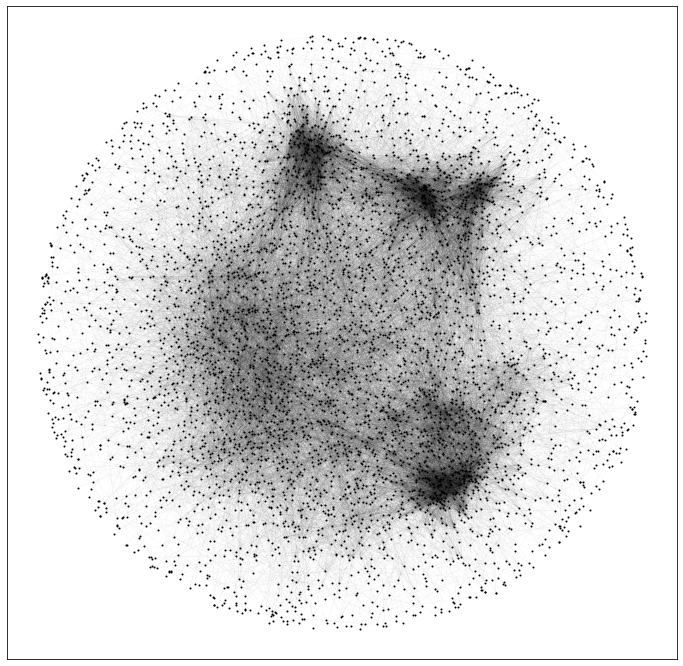

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
e_pcc.plot_network_spring(ax=ax,
                         node_size = 1,#[100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         node_color ='black',# ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black')
#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='black')
ax.set_facecolor('white')
#plt.savefig('reports/figures/poster_figures_1023/costanzo.png')
#nx.draw_networkx_edges(effector_sub_pcc, ax=ax , pos=pos, edge_color='yellow',alpha=0.2)

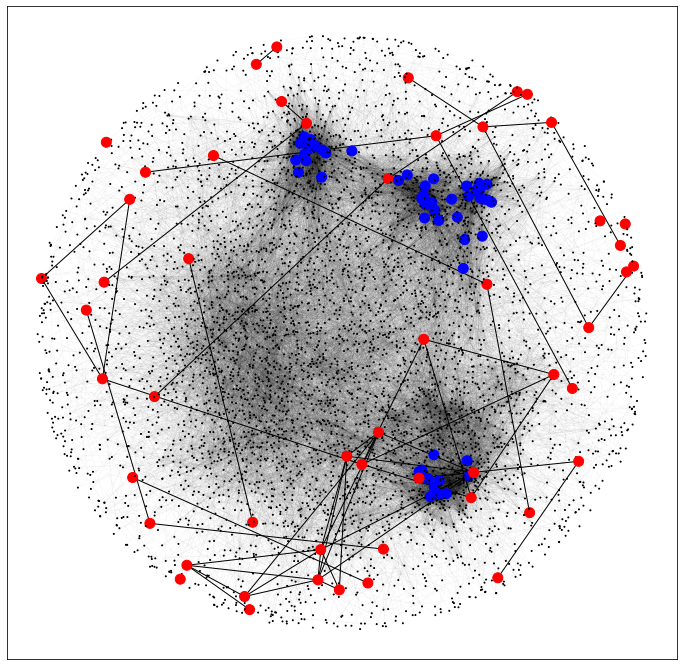

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
e_pcc.plot_network_spring(ax=ax,
                         node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black')
nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='black')
ax.set_facecolor('white')

#nx.draw_networkx_edges(effector_sub_pcc, ax=ax , pos=pos, edge_color='yellow',alpha=0.2)

# Effector to sensor path

In [21]:
from itertools import permutations, product
a = effector_pcc.orf_name.tolist()
b = sensors_pcc.orf_name.tolist()

product_a_b = [list(product(a,[i])) for i in b]


In [22]:
edges = [ ]
all_paths = [ ]
for i in b:
    product_a_b = list(product(a, [i]))
    shortest_path = [nx.shortest_path(gc,u[0],u[1]) for u in product_a_b]
    paths = [i for i in shortest_path if len(i) == min([len(i) for i in shortest_path])]
    all_paths.append(paths)
    for r in paths:
        route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
        edges.append(route_edges)

In [23]:
maximal_subsets = get_maximal_subsets([ item for sublist in all_paths for item in sublist])

In [75]:
effector_pcc.loc[effector_pcc.go_group=='mito',"orf_name"].tolist()

['coq1',
 'cox11',
 'gep5',
 'pet54',
 'rip1',
 'aim10',
 'coa2',
 'coa3',
 'cox12',
 'cox15',
 'cox16',
 'cox17',
 'cyc3',
 'mss2',
 'sco1',
 'coq4',
 'coa1']

In [66]:
grouped_paths = {
    'chromatin':[],
    'mito': [],
    'gly':[]
}

In [67]:
for itr, m in enumerate(maximal_subsets):
    if any([True if i in effector_pcc.loc[effector_pcc.go_group=='gly',"orf_name"].tolist() else False  for i in m]):
        grouped_paths['gly'].append( m )
    elif any([True if i in effector_pcc.loc[effector_pcc.go_group=='chromatin',"orf_name"].tolist() else False  for i in m]):
        grouped_paths['chromatin'].append(m)
    elif any([True if i in effector_pcc.loc[effector_pcc.go_group=='mito',"orf_name"].tolist() else False  for i in m]):
        grouped_paths['mito'].append(m)

In [72]:
eff_chr_to_sens = nx.induced_subgraph(e_pcc.graph_gc, np.unique([item for sublist in grouped_paths['chromatin'] for item in sublist]))
eff_mito_to_sens = nx.induced_subgraph(e_pcc.graph_gc, np.unique([item for sublist in grouped_paths['mito'] for item in sublist]))
eff_golgi_to_sens = nx.induced_subgraph(e_pcc.graph_gc, np.unique([item for sublist in grouped_paths['gly'] for item in sublist]))

In [81]:
prs_mat = e_pcc.prs_mat
np.fill_diagonal(prs_mat, 1)
prs_mat_df = pd.DataFrame(prs_mat,columns=e_pcc.nodes, index=e_pcc.nodes)

In [38]:

prs_mat_long = prs_mat_df.melt(ignore_index=False, var_name='gene2',value_name='prs')

In [80]:
prs_mat_df

dal82          aac1          qdr2         dfg10          aac3  \
dal82    0.000000e+00  3.493432e-01  3.386565e-02  1.876924e-06  9.604605e-06   
aac1     1.101101e-02  0.000000e+00  1.634314e-02  1.298155e-07  4.744777e-07   
qdr2     2.139741e-02  3.276141e-01  0.000000e+00  3.726273e-07  4.742707e-06   
dfg10    6.361439e-07  1.395919e-06  1.998856e-07  0.000000e+00  2.630429e-01   
aac3     3.141972e-07  4.924519e-07  2.455541e-07  2.538872e-02  0.000000e+00   
...               ...           ...           ...           ...           ...   
ynl043c  4.077664e-08  1.669754e-08  3.825851e-07  1.048565e-07  3.649967e-08   
yol085c  6.421491e-08  9.938003e-08  8.082193e-08  1.120132e-07  1.191587e-07   
yol035c  8.258772e-08  1.203310e-07  8.615223e-08  2.208486e-07  2.627997e-07   
yol159c  4.663233e-07  5.610061e-07  4.384816e-07  4.359171e-07  5.263186e-07   
ypl114w  1.550558e-07  7.363361e-09  1.855282e-08  1.617375e-07  1.627709e-07   

               pet309          ald2         aad10          bna3          dig2  \
dal82    8.452619e-06  1.047887e-10  7.733832e-07  1.234764e-06  6.563142e-07   
aac1     4.574032e-07  3.010505e-08  1.171617e-07  1.609787e-07  7.975351e-08   
qdr2     4.920532e-06  3.480840e-10  7.041159e-07  1.398532e-06  1.281455e-07   
dfg10    7.221320e-04  2.324443e-06  2.520003e-06  3.158572e-06  2.095169e-06   
aac3     1.621939e-03  3.767714e-07  4.042273e-07  4.696863e-07  3.571852e-07   
...               ...           ...           ...           ...           ...   
ynl043c  9.976471e-09  4.157128e-08  7.321621e-08  1.086191e-07  8.088858e-08   
yol085c  6.912178e-08  8.215456e-10  5.833959e-08  1.463293e-08  4.842310e-08   
yol035c  1.957682e-07  1.909822e-07  2.243110e-07  2.401663e-07  2.001251e-07   
yol159c  4.067474e-07  3.151581e-07  3.329227e-07  3.973549e-07  3.515457e-07   
ypl114w  1.016264e-07  1.101696e-07  1.051162e-07  1.454741e-07  1.304671e-07   

         ...       ymr310c       ymr265c     ymr316c-b     ymr304c-a  \
dal82    ...  1.301100e-05  2.056641e-07  3.766260e-05  2.644047e-05   
aac1     ...  7.304227e-07  3.213159e-07  6.983415e-07  6.915011e-07   
qdr2     ...  1.062043e-05  4.848659e-05  1.162036e-06  3.356621e-06   
dfg10    ...  1.169499e-05  6.629650e-06  1.195402e-05  8.218817e-06   
aac3     ...  1.447223e-06  2.064841e-08  1.674150e-06  1.028287e-06   
...      ...           ...           ...           ...           ...   
ynl043c  ...  3.282270e-07  2.692843e-08  1.452558e-07  1.425119e-07   
yol085c  ...  2.976409e-07  1.801191e-07  3.252778e-07  2.417678e-07   
yol035c  ...  3.499173e-07  3.186365e-07  5.893727e-07  4.408579e-07   
yol159c  ...  8.730162e-07  7.092353e-07  5.278356e-07  1.967146e-07   
ypl114w  ...  3.129015e-07  1.138059e-07  7.857935e-08  1.354507e-07   

              ymr315w       ynl043c       yol085c       yol035c       yol159c  \
dal82    5.086460e-05  6.014624e-06  2.751799e-05  2.391749e-05  7.355463e-05   
aac1     7.052156e-07  7.762906e-08  1.342316e-06  1.098380e-06  2.789108e-06   
qdr2     1.048769e-07  3.565553e-05  2.188325e-05  1.576408e-05  4.369947e-05   
dfg10    1.638685e-05  5.242051e-06  1.626893e-05  2.167722e-05  2.330427e-05   
aac3     2.476640e-06  1.761201e-07  1.670434e-06  2.489704e-06  2.715779e-06   
...               ...           ...           ...           ...           ...   
ynl043c  1.480258e-07  0.000000e+00  2.527261e-07  6.238797e-07  6.891226e-07   
yol085c  4.211539e-07  8.698939e-08  0.000000e+00  3.635354e-07  3.121519e-07   
yol035c  7.594093e-07  3.177589e-07  5.379321e-07  0.000000e+00  7.029395e-07   
yol159c  1.019132e-06  6.444223e-07  8.480547e-07  1.290610e-06  0.000000e+00   
ypl114w  3.709626e-08  7.422920e-08  3.029027e-07  4.408552e-07  4.300063e-07   

              ypl114w  
dal82    7.746168e-05  
aac1     1.159444e-07  
qdr2     5.856129e-06  
dfg10    2.738535e-05  
aac3     2.660102e-06  
...               ...  
ynl043c  2.514065e-07  
yol085c  3.531190e-07  
yol035c  7.60491

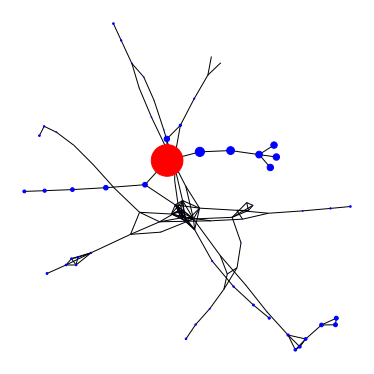

In [84]:

nx.draw(eff_chr_to_sens    ,
node_size = [1000*i for i in prs_mat_df.loc['tvp18',[i for i in eff_chr_to_sens.nodes]].tolist()],
       node_color = ['red' if i =='tvp18' else 'blue' for i in eff_chr_to_sens.nodes])

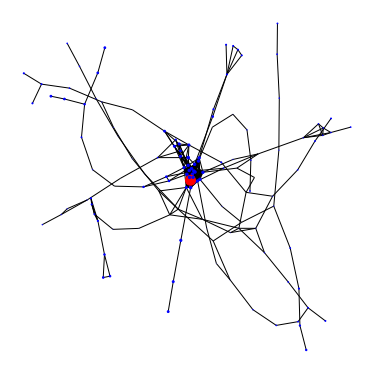

In [86]:

nx.draw(eff_mito_to_sens    ,
node_size = [100*i for i in prs_mat_df.loc['cox12',[i for i in eff_mito_to_sens.nodes]].tolist()],
       node_color = ['red' if i =='cox12' else 'blue' for i in eff_mito_to_sens.nodes])

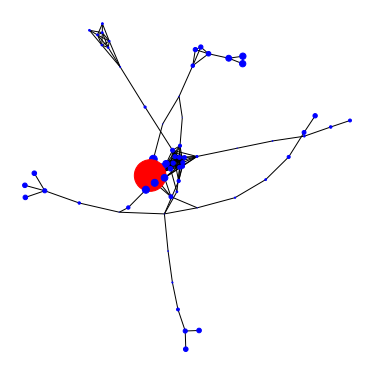

In [90]:

nx.draw(eff_golgi_to_sens    ,
node_size = [1000*i for i in prs_mat_df.loc['gab1-3',[i for i in eff_golgi_to_sens.nodes]].tolist()],
       node_color = ['red' if i =='gab1-3' else 'blue' for i in eff_golgi_to_sens.nodes])

In [1051]:
effector_pcc.groupby('go_group').mean()

deg     eig_0     eig_1     eig_2     eig_3     eig_4  \
go_group                                                                 
chromatin  89.666667  0.001826  0.000229  0.002961 -0.002777  0.002354   
gly        98.608696  0.000475 -0.008358  0.001048  0.000654  0.002975   
mito       83.411765  0.000601 -0.001500 -0.000979 -0.000311 -0.000362   

              eig_5     eig_6     eig_7        eff      sens       btw  \
go_group                                                                 
chromatin -0.000655 -0.004254  0.001107  16.925090  3.102360  0.002676   
gly       -0.000323  0.001301  0.002943  17.840200  3.366627  0.001771   
mito       0.000192 -0.000490 -0.002549  18.370234  3.806511  0.003064   

              trans  eigenvec_centr  closeness_centr  smallest_eigenvec  \
go_group                                                                  
chromatin  0.370329        0.000202         0.242690          -0.000583   
gly        0.410483        0.103233         0.251822          -0.000524   
mito       0.450211        0.000116         0.250877          -0.000440   

                   num        bin  neighbor_btw  neighbor_degree  
go_group                                                          
chromatin  6732.166667  67.833333      0.000944        51.459725  
gly        7521.130435  75.652174      0.001186        57.817032  
mito       3320.764706  33.647059      0.001504        51.953939

## Effector go group check

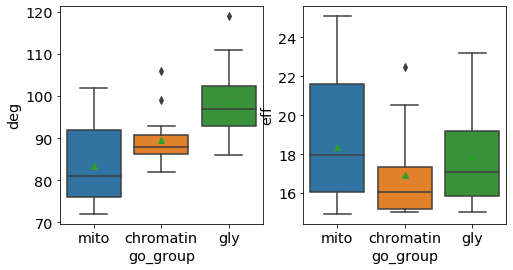

In [1059]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x='go_group', y='deg', data = effector_pcc,ax=ax1,showmeans=True)
sns.boxplot(x='go_group', y='eff', data = effector_pcc,ax=ax2,showmeans=True)

In [1195]:
%%R -i effector_pcc
effector_pcc$go_group = as.factor(effector_pcc$go_group)
res.aov <- kruskal.test(deg~go_group, data= effector_pcc)
res.aov
#summary(res.aov)
#plot(res.aov, 2)


	Kruskal-Wallis rank sum test

data:  deg by go_group
Kruskal-Wallis chi-squared = 20.72, df = 2, p-value = 3.168e-05



In [1264]:
%%R 
FSA::dunnTest(deg~go_group, data= effector_pcc, method='bonferroni')

R[write to console]: Dunn (1964) Kruskal-Wallis multiple comparison

R[write to console]:   p-values adjusted with the Bonferroni method.




        Comparison         Z      P.unadj        P.adj
1  chromatin - gly -2.582735 9.802068e-03 2.940620e-02
2 chromatin - mito  1.335920 1.815754e-01 5.447262e-01
3       gly - mito  4.450319 8.574289e-06 2.572287e-05


In [1263]:
%%R -i effector_pcc
effector_pcc$go_group = as.factor(effector_pcc$go_group)
res.aov <- kruskal.test(eff~go_group, data= effector_pcc)
res.aov
#summary(res.aov)


	Kruskal-Wallis rank sum test

data:  eff by go_group
Kruskal-Wallis chi-squared = 2.0679, df = 2, p-value = 0.3556



## Sensor go group check

[None, None, None, None, None, None, None, None, None, None, None, None]

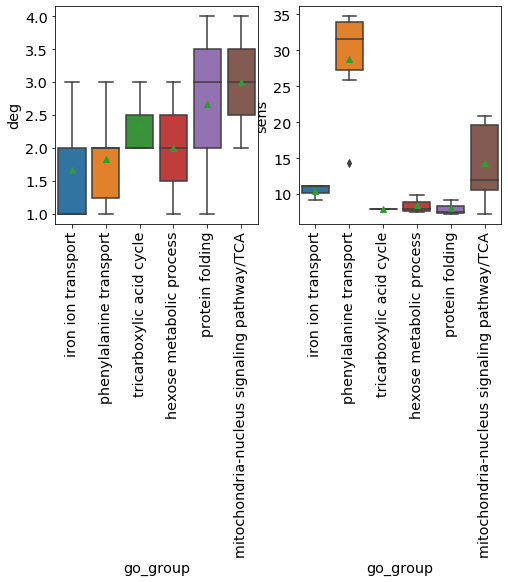

In [1121]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
sns.boxplot( x = 'go_group', y='deg', data = sensors_pcc, ax=ax1,showmeans=True)
plt.setp(ax1.get_xticklabels(), rotation=90)
sns.boxplot(x = 'go_group', y='sens', data = sensors_pcc,ax=ax2,showmeans=True)
plt.setp(ax2.get_xticklabels(), rotation=90)


In [1265]:
%%R -i sensors_pcc
sensors_pcc$go_group = as.factor(sensors_pcc$go_group)
res.aov <- kruskal.test(deg~go_group, data= sensors_pcc)
res.aov


	Kruskal-Wallis rank sum test

data:  deg by go_group
Kruskal-Wallis chi-squared = 6.5204, df = 5, p-value = 0.2588



In [1267]:
%%R -i sensors_pcc
#effector_pcc$go_group = as.factor(effector_pcc$go_group)
res.aov <- kruskal.test(sens~go_group, data= sensors_pcc)
res.aov


	Kruskal-Wallis rank sum test

data:  sens by go_group
Kruskal-Wallis chi-squared = 17.242, df = 5, p-value = 0.004063



In [1266]:
%%R 
FSA::dunnTest(sens~go_group, data= sensors_pcc, method='bonferroni')

R[write to console]: Dunn (1964) Kruskal-Wallis multiple comparison

R[write to console]:   p-values adjusted with the Bonferroni method.




                                                                Comparison
1                          hexose metabolic\nprocess - iron ion\ntransport
2  hexose metabolic\nprocess - mitochondria-nucleus\nsignaling pathway/TCA
3        iron ion\ntransport - mitochondria-nucleus\nsignaling pathway/TCA
4                     hexose metabolic\nprocess - phenylalanine\ntransport
5                           iron ion\ntransport - phenylalanine\ntransport
6   mitochondria-nucleus\nsignaling pathway/TCA - phenylalanine\ntransport
7                              hexose metabolic\nprocess - protein folding
8                                    iron ion\ntransport - protein folding
9            mitochondria-nucleus\nsignaling pathway/TCA - protein folding
10                              phenylalanine\ntransport - protein folding
11                   hexose metabolic\nprocess - tricarboxylic\nacid cycle
12                         iron ion\ntransport - tricarboxylic\nacid cycle
13 mitochondria-nucleus\n

In [1203]:
%%R 
# Extract the residuals
aov_residuals <- residuals(object = res.aov )
# Run Shapiro-Wilk test
shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.90126, p-value = 0.01954



In [1125]:
%%R
tky = TukeyHSD(res.aov)

In [1138]:
%%R
tky$go_group[,4]

                        iron ion transport-hexose metabolic process 
                                                       0.9957314291 
mitochondria-nucleus signaling pathway/TCA-hexose metabolic process 
                                                       0.5600454167 
                   phenylalanine transport-hexose metabolic process 
                                                       0.0002485168 
                           protein folding-hexose metabolic process 
                                                       0.9999984113 
                  tricarboxylic acid cycle-hexose metabolic process 
                                                       0.9999969252 
      mitochondria-nucleus signaling pathway/TCA-iron ion transport 
                                                       0.8781910028 
                         phenylalanine transport-iron ion transport 
                                                       0.0008502552 
                                 p

In [1131]:
%%R
tky$go_group[tky$go_group$padj<0.05,]

R[write to console]: Error in tky$go_group$padj : $ operator is invalid for atomic vectors
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in tky$go_group$padj : $ operator is invalid for atomic vectors
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [1258]:
%%R
FSA::dunnTest(eff~go_group,effector_pcc)

File: /tmp/RtmprYmWqF/Rtxt2cd77801dfb6
LocationTests               package:coin               R Documentation



_T_w_o- _a_n_d _K-_S_a_m_p_l_e _L_o_c_a_t_i_o_n _T_e_s_t_s



_D_e_s_c_r_i_p_t_i_o_n:



     Testing the equality of the distributions of a numeric response

     variable in two or more independent groups against shift

     alternatives.



_U_s_a_g_e:



     ## S3 method for class 'formula'

     oneway_test(formula, data, subset = NULL, weights = NULL, ...)

     ## S3 method for class 'IndependenceProblem'

     oneway_test(object, ...)

     

     ## S3 method for class 'formula'

     wilcox_test(formula, data, subset = NULL, weights = NULL, ...)

     ## S3 method for class 'IndependenceProblem'

     wilcox_test(object, conf.int = FALSE, conf.level = 0.95, ...)

     

     ## S3 method for class 'formula'

     kruskal_test(formula, data, subset = NULL, weights = NULL, ...)

     ## S3 method for class 'IndependenceProbl

In [1260]:
%%R
effector_pcc$go_group = as.factor(effector_pcc$go_group)
FSA::dunnTest(deg~go_group,effector_pcc)#effector_pcc

R[write to console]: Dunn (1964) Kruskal-Wallis multiple comparison

R[write to console]:   p-values adjusted with the Holm method.




        Comparison         Z      P.unadj        P.adj
1  chromatin - gly -2.582735 9.802068e-03 1.960414e-02
2 chromatin - mito  1.335920 1.815754e-01 1.815754e-01
3       gly - mito  4.450319 8.574289e-06 2.572287e-05


In [1261]:
%%R 
sensors_pcc$go_group = as.factor(sensors_pcc$go_group)
FSA::dunnTest(sens~go_group, sensors_pcc)

R[write to console]: Dunn (1964) Kruskal-Wallis multiple comparison

R[write to console]:   p-values adjusted with the Holm method.




                                                                Comparison
1                          hexose metabolic\nprocess - iron ion\ntransport
2  hexose metabolic\nprocess - mitochondria-nucleus\nsignaling pathway/TCA
3        iron ion\ntransport - mitochondria-nucleus\nsignaling pathway/TCA
4                     hexose metabolic\nprocess - phenylalanine\ntransport
5                           iron ion\ntransport - phenylalanine\ntransport
6   mitochondria-nucleus\nsignaling pathway/TCA - phenylalanine\ntransport
7                              hexose metabolic\nprocess - protein folding
8                                    iron ion\ntransport - protein folding
9            mitochondria-nucleus\nsignaling pathway/TCA - protein folding
10                              phenylalanine\ntransport - protein folding
11                   hexose metabolic\nprocess - tricarboxylic\nacid cycle
12                         iron ion\ntransport - tricarboxylic\nacid cycle
13 mitochondria-nucleus\n

In [100]:
effector_pcc.loc[effector_pcc.go_group=='gly',"orf_name"].tolist()

['gpi10-5001',
 'gpi8-5001',
 'ost3',
 'wbp1-1',
 'wbp1-2',
 'gab1-1',
 'gab1-2',
 'gab1-3',
 'gpi16-5001',
 'gpi17-5001',
 'las21',
 'cop1-1',
 'csf1',
 'kre5-ts2',
 'arl3',
 'sys1',
 'arl1',
 'cog5',
 'cog6',
 'cog8',
 'erv14',
 'vti1-2',
 'ypt1-3']

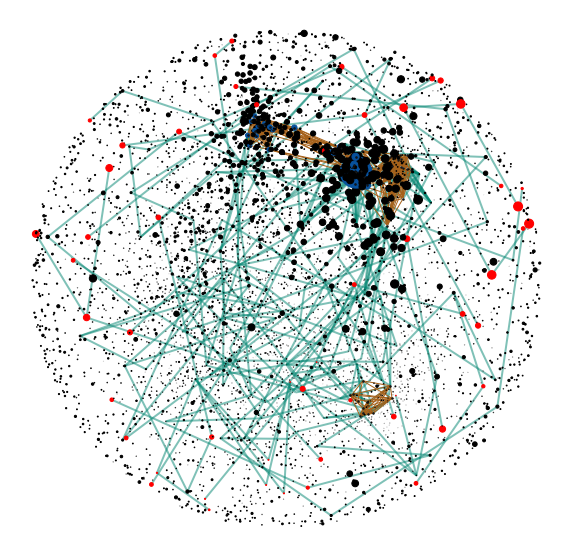

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
                   Line2D([0], [0], marker='o', color='#bdd7e7', label='Effectors (Respiration)',
                              markerfacecolor='#bdd7e7', markersize=10, linestyle="None"),
                   Line2D([0], [0], marker='o', color='#3182bd', label='Effectors (Chromosome Segragation)',
                              markerfacecolor='#3182bd', markersize=10, linestyle="None"),
                   Line2D([0], [0], marker='o', color='#08519c', label='Effectors (Golgi vesicle transport)',
                              markerfacecolor='#08519c', markersize=10, linestyle="None"),
                   Line2D([0], [0], marker='o', color='red', label='Sensors',
                              markerfacecolor='red', markersize=10, linestyle="None"),
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-"),
                   Line2D([0], [0], marker='o', color='#018571', label= 'Edges on the\nEffector to Sensor\nPath',
                              markerfacecolor='#018571', markersize=0, linestyle="-"),
                   Line2D([0], [0], marker='o', color='#a6611a', label= 'Effector-Effector edges',
                              markerfacecolor='#a6611a', markersize=0, linestyle="-")
                       ]
e_pcc.plot_network_spring(ax=ax,
                          node_size = [1000*i for i in prs_mat_df.loc['cog8',[i for i in e_pcc.graph_gc.nodes]].tolist()],
                         #node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],edge_color='black',
                         node_color = ['red' if i in sensors_pcc.orf_name.values else 
                                       '#bdd7e7' if i in effector_pcc.loc[effector_pcc.go_group=='mito'].orf_name.values else 
                                       '#3182bd' if i in effector_pcc.loc[effector_pcc.go_group=='chromatin'].orf_name.values else 
                                       '#08519c' if i in effector_pcc.loc[effector_pcc.go_group=='gly'].orf_name.values else 
                                       'black' for i in e_pcc.nodes])
nx.draw_networkx_nodes(e_pcc.graph_gc, ax=ax, nodelist=effector_pcc.orf_name.tolist(), pos=pos, node_color='white', edgecolors='black',node_size= 2)
#for i in list(set([ item for sublist in edges for item in sublist])):
nx.draw_networkx_edges(e_pcc.graph_gc, ax=ax, edgelist=list(set([ item for sublist in edges for item in sublist])) , pos=pos, edge_color='#018571',alpha=0.5, width = 2)
#nx.draw_networkx_edges(e_pcc.graph_gc, ax=ax , edgelist=effector_pcc.orf_name.tolist(), pos=pos, edge_color='#018571',alpha=0.5, width = 2)

ax.set_facecolor('white')
ax.set_axis_off()
#lgd = ax.legend(handles=legend_elements, fontsize=18,loc='center left', bbox_to_anchor=(1.1, 0.5))

nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc,effector_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='#a6611a')

# nx.draw_networkx_nodes(e_pcc.graph_gc    , pos=pos,
# node_size = [1000*i for i in prs_mat_df.loc['cox12',[i for i in e_pcc.graph_gc.nodes]].tolist()],
#        node_color = ['red' if i =='cox12' else 'blue' for i in e_pcc.graph_gc.nodes])
#plt.savefig('tmp_nw.png',bbox_inches='tight')

## Effector sensors group plot

In [1268]:
%%R -i effector_pcc -i sensors_pcc
library(tidyverse)
eff_deg_comp<-ggplot(effector_pcc, aes(x= go_group, y=deg,fill=go_group))+
    geom_boxplot()+
    scale_fill_discrete(labels=c('Chromosome\nSegragetion','Golgi vesicle\nTransport','Respiratory complex\nassembly'))+
    xlab('')+
    ylab('Degree')+
    theme_bw()+
    theme(axis.text.x=element_blank(),legend.title=element_blank(),legend.text = element_text(margin=margin(t=10,b=10)))#, legend.spacing.y = unit(2,'in'))
eff_eff_comp<-ggplot(effector_pcc, aes(x= go_group, y=eff,fill=go_group))+
    geom_boxplot()+
    #scale_x_discrete(labels=c('Chromosome\nSegragetion','Golgi vesicle\nTransport','Respiratory complex\nassembly'))+
    xlab('')+
    ylab('Effectiveness')+
    theme_bw()+
    theme(axis.text.x=element_blank(),legend.title=element_blank())

sens_deg_comp<-ggplot(sensors_pcc%>%drop_na(), aes(x= go_group, y=deg,fill=go_group))+
    geom_boxplot()+
#    scale_x_discrete(labels=c('Chromosome\nSegragetion','Golgi vesicle\nTransport','Respiratory complex\nassembly'))+
    xlab('')+
    ylab('Degree')+
    scale_fill_brewer(palette="Dark2")+
    theme_bw()+
    theme(axis.text.x=element_blank(),legend.title=element_blank(),
          legend.text = element_text(margin=margin(t=10,b=10)))#, legend.spacing.y = unit(2,'cm'))
sens_sens_comp<-ggplot(sensors_pcc%>%drop_na(), aes(x= go_group, y=sens,fill=go_group))+
    geom_boxplot()+
#    scale_x_discrete(labels=c('Chromosome\nSegragetion','Golgi vesicle\nTransport','Respiratory complex\nassembly'))+
    xlab('')+
    ylab('Sensitivity')+
    scale_fill_brewer(palette="Dark2")+
    theme_bw()+
    theme(axis.text.x=element_blank(),legend.title=element_blank())

img <- 'tmp_nw.png' %>%
  magick::image_read() #%>%
  #magick::image_resize("570x380") 

nw_img = cowplot::ggdraw()+
    cowplot::draw_image(img, width=1)
go_plots = cowplot::plot_grid(eff_deg_comp+theme(legend.position='none'),
                   eff_eff_comp+theme(legend.position='none'),
                   cowplot::get_legend(eff_deg_comp),
                   sens_deg_comp+theme(legend.position='none'),
                   sens_sens_comp+theme(legend.position='none'),
                   cowplot::get_legend(sens_deg_comp),ncol=3, labels=c('B','C','','D','E',''))

combined = cowplot::plot_grid(nw_img, go_plots,nrow=2,rel_heights=c(0.3,0.7), labels=c('A',''))
ggsave('reports/figures/paper_figures_0916/fig6.png',plot=combined,width=7,height=12)

# High degree / Low eff investigation

In [377]:
high_deg = e_pcc.df.loc[e_pcc.df.deg>np.quantile(e_pcc.df.deg,0.99)]

In [378]:
high_btw = e_pcc.df.loc[e_pcc.df.btw>np.quantile(e_pcc.df.btw,0.99)]

Text(0, 0.5, 'Effectiveness')

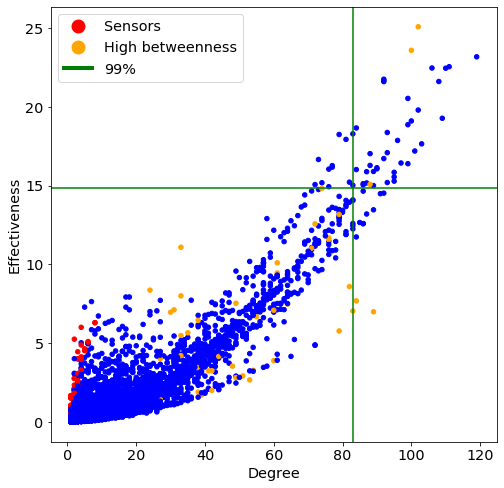

In [379]:
fig,ax = plt.subplots(figsize=(8,8))
e_pcc.df.plot.scatter('deg','eff',ax=ax,color=['red' if i in sensors_pcc.orf_name.values else 'orange' if i in high_btw.orf_name.values else 'blue' for i in e_pcc.nodes])
ax.axvline(np.quantile(e_pcc.df.deg,0.99),c='green')
ax.axhline(np.quantile(e_pcc.df.eff,0.99),c='green')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Sensors',
                          markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='High betweenness',
                          markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], color='green', lw=4, label='99%')
                   ]
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xlabel('Degree')
ax.set_ylabel('Effectiveness')

In [380]:
high_eff_low_deg = effector_pcc.loc[effector_pcc.orf_name.isin(high_deg.orf_name)==False]
#high_eff_low_deg.orf_name.tolist()

In [381]:
low_eff_high_deg = high_deg.loc[high_deg.orf_name.isin(effector_pcc.orf_name)==False]
#low_eff_high_deg.orf_name.tolist()

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


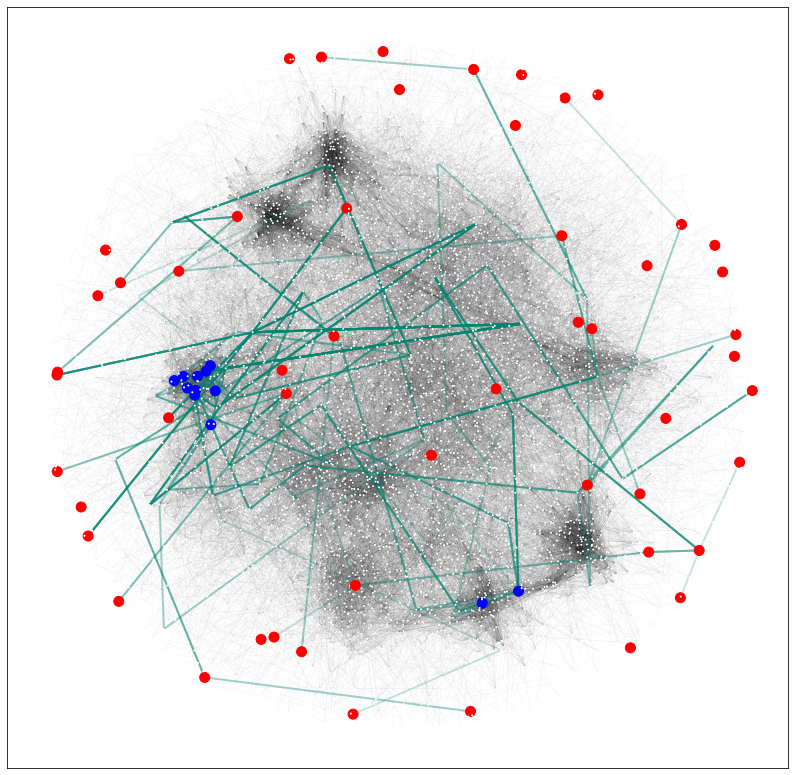

In [956]:
fig, ax = plt.subplots(figsize=(14,14))
e_pcc.plot_network_spring(ax=ax,
                         node_size = [100 if i in sensors_pcc.orf_name.values or i in high_eff_low_deg.orf_name.values else 1 for i in e_pcc.nodes],edge_color='black',
                         node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in high_eff_low_deg.orf_name.values else 'white' for i in e_pcc.nodes])
#nx.draw_networkx_nodes(e_pcc.graph_gc, ax=ax, nodelist=high_eff_low_deg.orf_name.tolist(), pos=pos, node_color='white', edgecolors='black',node_size= 2)
high_eff_paths = [j for j in [item for sublist in all_paths for item in sublist] for i in high_eff_low_deg.orf_name if i in j ]
high_eff_routes = []
#for i in [np.argwhere(effector_pcc.orf_name==i)[0][0] for i in high_eff_low_deg.orf_name]:
for r in high_eff_paths:
    route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
    high_eff_routes.append(route_edges)
    nx.draw_networkx_edges(e_pcc.graph_gc, ax=ax, edgelist=route_edges , pos=pos, edge_color='#018571',alpha=0.2, width = 2)

        #edges.append(route_edges)
ax.set_facecolor('white')
#nx.draw_networkx_edges(nx.induced_subgraph(e_pcc.graph_gc, sensors_pcc.orf_name.tolist()), ax=ax , pos=pos, edge_color='#a6611a')


In [383]:
eff_sens_sub = nx.induced_subgraph(e_pcc.graph_gc, np.unique([i for j in high_eff_paths for i in j]))
pos_eff_sens = nx.kamada_kawai_layout(eff_sens_sub)

In [384]:
eff_sens_sub_towrite = eff_sens_sub.copy()
nx.set_node_attributes(eff_sens_sub_towrite,dict(zip(eff_sens_sub_towrite.nodes, ['eff' if i in effector_pcc.orf_name.tolist() else 'sens' if i in sensors_pcc.orf_name.tolist() else 'intermediate' for i in eff_sens_sub_towrite.nodes])),'eff_sens')
for i, j in eff_sens_sub_towrite.nodes(data=True):
    del j['pos'] 
nx.write_graphml(eff_sens_sub_towrite, 'data/interim/eff_sens_sub.graphml')

# Heatmap

In [593]:
prs_mat = e_pcc.prs_mat

(array([0.00140717, 0.00085994, 0.00101435, ..., 0.00116051, 0.00100306,
        0.00101343]),
 array([0.00670243, 0.00670243, 0.00610539, ..., 0.00058769, 0.00084201,
        0.00099961]))

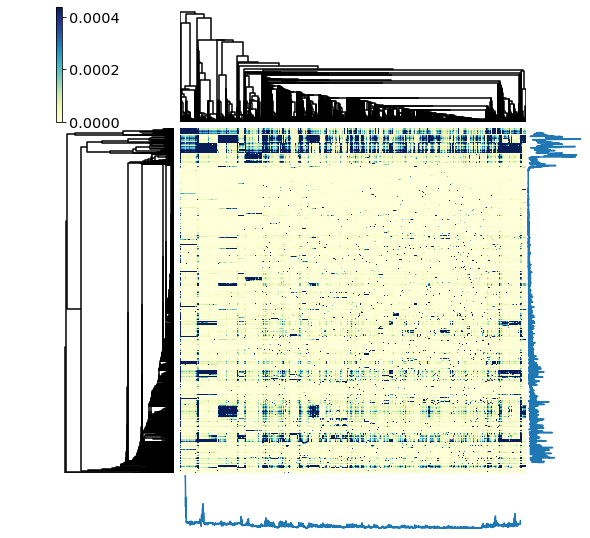

In [634]:
e_pcc.heatmap_annotated()

(array([0.00153055, 0.0009429 , 0.00140651, ..., 0.00043989, 0.00154421,
        0.00214008]),
 array([0.00499606, 0.00670243, 0.00670243, ..., 0.0010747 , 0.00105166,
        0.00153976]))

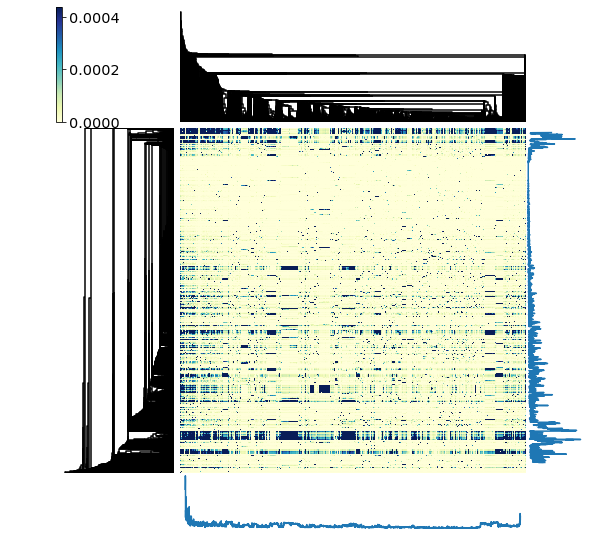

In [635]:
e_pcc.heatmap_annotated(method = 'complete')

RecursionError: maximum recursion depth exceeded while getting the str of an object

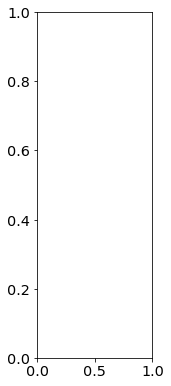

In [636]:
e_pcc.heatmap_annotated(method = 'single')

(array([1.53054893e-03, 9.42897270e-04, 1.40650610e-03, ...,
        4.39169064e-07, 3.71035703e-07, 3.31151474e-07]),
 array([2.76610007e-03, 4.99606083e-03, 6.70242807e-03, ...,
        4.92459995e-05, 4.77300267e-05, 3.94080037e-05]))

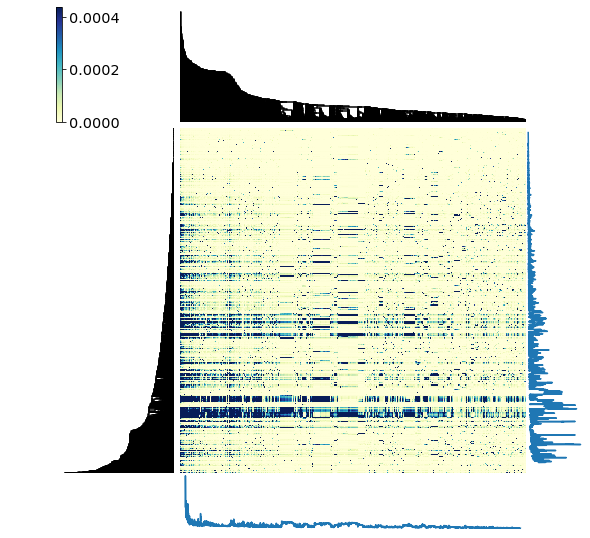

In [637]:
e_pcc.heatmap_annotated(method = 'average')

(array([0.00153055, 0.00153065, 0.00161468, ..., 0.0003348 , 0.00050421,
        0.00052687]),
 array([0.0027661 , 0.00499606, 0.00670243, ..., 0.000663  , 0.00033162,
        0.00043798]))

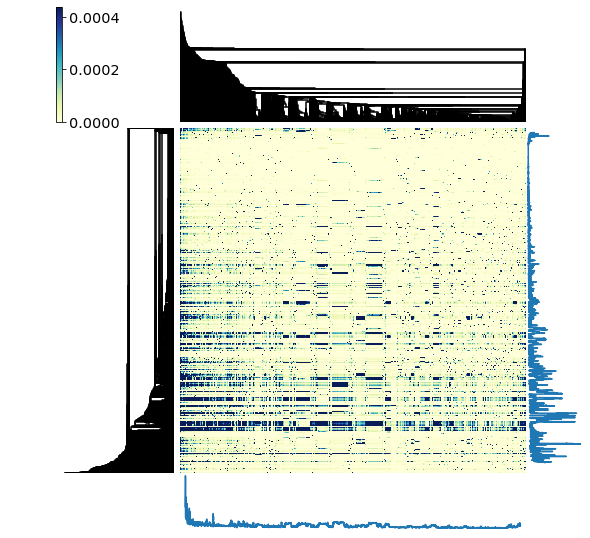

In [638]:
e_pcc.heatmap_annotated(method = 'weighted')

In [516]:
import scipy.cluster.hierarchy as sch

In [650]:
Z = col_linkage
link_cols = {}
for i, i12 in enumerate(col_linkage[:,:2].astype(int)):
    c1, c2 = (link_cols[x] if x > len(Z) else [x]
    for x in i12)
    link_cols[i+1+len(Z)] = c1 if c1 == c2 else 'grey'
    break

In [735]:
prs_mat = e_pcc.prs_mat
quantile_threshold =  0.95
method = 'ward'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99

# , optimal_ordering=True)
row_linkage = sch.linkage(sch.distance.pdist(prs_mat), method=method)
# ,optimal_ordering=True)
col_linkage = sch.linkage(sch.distance.pdist(prs_mat.T), method=method)

# Z1 = sch.dendrogram(row_linkage, orientation='left',
#         link_color_func=lambda k: 'black')
Z = row_linkage


    


In [939]:
prs_mat = e_pcc.prs_mat
quantile_threshold =  0.95
method = 'ward'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99
# , optimal_ordering=True)
row_linkage = sch.linkage(sch.distance.pdist(prs_mat), method=method)
# ,optimal_ordering=True)
col_linkage = sch.linkage(sch.distance.pdist(prs_mat.T), method=method)


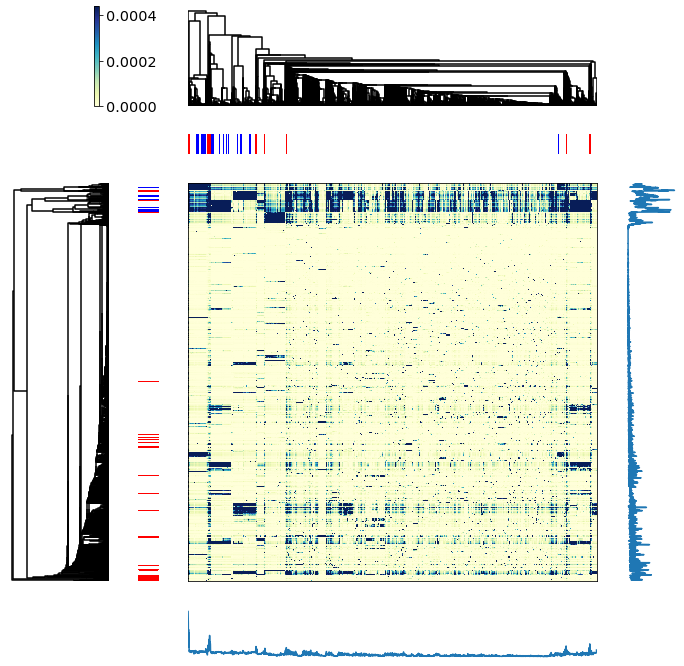

In [940]:
colors = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'none' for i in e_pcc.nodes]
fig = plt.figure(figsize=(12, 12))
from matplotlib import gridspec
gs = gridspec.GridSpec(4,4, width_ratios=[1,.2,4,.5], height_ratios=[1,.2,4,.5])
ax_row_dend = fig.add_subplot(gs[2,0])
ax_col_dend = fig.add_subplot(gs[0,2])
ax_row_dend.set_axis_off()
ax_col_dend.set_axis_off()

ax_row_colors = fig.add_subplot(gs[2,1])
ax_col_colors = fig.add_subplot(gs[1,2])

ax_heatmap = fig.add_subplot(gs[2,2])

ax_row_data = fig.add_subplot(gs[2,3])
ax_row_data.set_axis_off()

ax_col_data = fig.add_subplot(gs[3,2])
ax_col_data.set_axis_off()
# Y = sch.linkage(D, method='centroid')
# orientation='left' is reponsible for making the
# dendrogram appear to the left
Z1 = sch.dendrogram(row_linkage, orientation='left',
        link_color_func=lambda k: 'black', ax = ax_row_dend)
# top side dendogram
#Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(col_linkage, color_threshold=0, 
                    link_color_func=lambda k: 'black',
                   ax = ax_col_dend)


#axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx1,axis=0)
heatmap(np.flip(matrix), cmap=cmap, cbar=False, ax = ax_row_colors, xticklabels=False, yticklabels=False)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx2,axis=1)
heatmap(matrix, cmap=cmap, cbar=False, ax = ax_col_colors, xticklabels=False, yticklabels=False)

#prs_mat = e_pcc.prs_mat
#prs_mat = prs_mat[idx1, :]
#prs_mat = prs_mat[:, idx2]
prs_mat_cl = prs_mat_cl[idx1, :]
prs_mat_cl = prs_mat_cl[:, idx2]
# the actual heat-map
im = ax_heatmap.matshow(prs_mat_cl, aspect='auto',
                      origin='lower', cmap="YlGnBu")
ax_heatmap.set_xticks([])
ax_heatmap.set_yticks([])

# xticks to the right (x-axis)
#ax_heatmap.set_xticks(range(40))
ax_heatmap.set_xticklabels(idx1, minor=False)
ax_heatmap.xaxis.set_label_position('bottom')
ax_heatmap.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=8)  # ,colors='black')

# xticks to the right (y-axis)
#ax_heatmap.set_yticks(range(40))
ax_heatmap.set_yticklabels(idx2, minor=False)
ax_heatmap.yaxis.set_label_position('right')
ax_heatmap.yaxis.tick_right()
#ax_heatmap.set_axis_off()
# to add the color bar
# axcolor = fig.add_axes([0.94, 0.1, 0.02, 0.6])
ax_colorbar = fig.add_subplot(gs[0, 0])
ax_colorbar.set_axis_off()
#ax_colorbar = fig.add_axes([0.0, 0.71, 0.1, .2])
row_data = np.mean(prs_mat[idx1, :], axis=1)
    # ,orientation=u'vertical')
ax_row_data.plot((row_data), range(len(row_data)), '-')
ax_row_data.set_ylim(0,len(row_data))

col_data = np.mean(prs_mat[:, idx2], axis=0)
    # ,orientation=u'vertical')
ax_col_data.plot(range(len(col_data)), col_data, '-')
ax_col_data.set_xlim(0,len(col_data))
#plt.axis('off')

plt.colorbar(im, ax=ax_colorbar)
plt.show()


In [910]:
u = np.mean(prs_mat)
sigma = np.std(prs_mat)
prs_mat_norm = (prs_mat-u)/sigma#normalize(prs_mat, axis=1, norm='l1')

# Normalized all

In [914]:
prs_mat = e_pcc.prs_mat
quantile_threshold =  0.95
method = 'ward'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99
# , optimal_ordering=True)
row_linkage_cl = sch.linkage(sch.distance.pdist(prs_mat_cl), method=method)
# ,optimal_ordering=True)
col_linkage_cl = sch.linkage(sch.distance.pdist(prs_mat_cl.T), method=method)



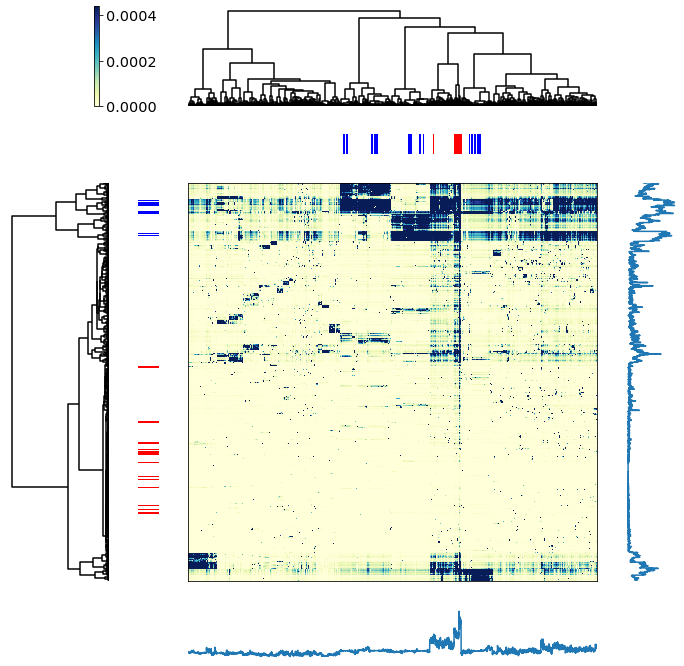

In [915]:

colors = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'none' for i in e_pcc.nodes]
fig = plt.figure(figsize=(12, 12))
from matplotlib import gridspec
gs = gridspec.GridSpec(4,4, width_ratios=[1,.2,4,.5], height_ratios=[1,.2,4,.5])
ax_row_dend = fig.add_subplot(gs[2,0])
ax_col_dend = fig.add_subplot(gs[0,2])
ax_row_dend.set_axis_off()
ax_col_dend.set_axis_off()

ax_row_colors = fig.add_subplot(gs[2,1])
ax_col_colors = fig.add_subplot(gs[1,2])

ax_heatmap = fig.add_subplot(gs[2,2])

ax_row_data = fig.add_subplot(gs[2,3])
ax_row_data.set_axis_off()

ax_col_data = fig.add_subplot(gs[3,2])
ax_col_data.set_axis_off()
# Y = sch.linkage(D, method='centroid')
# orientation='left' is reponsible for making the
# dendrogram appear to the left
Z1_cl = sch.dendrogram(row_linkage_cl, orientation='left',
        link_color_func=lambda k: 'black', ax = ax_row_dend)
# top side dendogram
#Y = sch.linkage(D, method='single')
Z2_cl = sch.dendrogram(col_linkage_cl, color_threshold=0, 
                    link_color_func=lambda k: 'black',
                   ax = ax_col_dend)


#axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1_cl = Z1_cl['leaves']
idx2_cl = Z2_cl['leaves']

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx1_cl,axis=0)
heatmap(np.flip(matrix), cmap=cmap, cbar=False, ax = ax_row_colors, xticklabels=False, yticklabels=False)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx2_cl,axis=1)
heatmap(matrix, cmap=cmap, cbar=False, ax = ax_col_colors, xticklabels=False, yticklabels=False)

#prs_mat = e_pcc.prs_mat
#prs_mat = prs_mat[idx1, :]
#prs_mat = prs_mat[:, idx2]
prs_mat_cl = prs_mat_cl[idx1_cl, :]
prs_mat_cl = prs_mat_cl[:, idx2_cl]
# the actual heat-map
im = ax_heatmap.matshow(prs_mat_cl, aspect='auto', #norm=mpl.colors.PowerNorm(gamma=2), 
                      origin='lower', cmap="YlGnBu")
ax_heatmap.set_xticks([])
ax_heatmap.set_yticks([])

# xticks to the right (x-axis)
#ax_heatmap.set_xticks(range(40))
ax_heatmap.set_xticklabels(idx1_cl, minor=False)
ax_heatmap.xaxis.set_label_position('bottom')
ax_heatmap.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=8)  # ,colors='black')

# xticks to the right (y-axis)
#ax_heatmap.set_yticks(range(40))
ax_heatmap.set_yticklabels(idx2_cl, minor=False)
ax_heatmap.yaxis.set_label_position('right')
ax_heatmap.yaxis.tick_right()
#ax_heatmap.set_axis_off()
# to add the color bar
# axcolor = fig.add_axes([0.94, 0.1, 0.02, 0.6])
ax_colorbar = fig.add_subplot(gs[0, 0])
ax_colorbar.set_axis_off()
#ax_colorbar = fig.add_axes([0.0, 0.71, 0.1, .2])
row_data = np.mean(prs_mat_cl, axis=1)
    # ,orientation=u'vertical')
ax_row_data.plot((row_data), range(len(row_data)), '-')
ax_row_data.set_ylim(0,len(row_data))

col_data = np.mean(prs_mat_cl, axis=0)
    # ,orientation=u'vertical')
ax_col_data.plot(range(len(col_data)), col_data, '-')
ax_col_data.set_xlim(0,len(col_data))
#plt.axis('off')

plt.colorbar(im, ax=ax_colorbar)
plt.show()


# Non-normalized TCA

In [948]:
prs_mat = e_pcc.prs_mat
quantile_threshold =  0.95
method = 'ward'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99
# , optimal_ordering=True)
row_linkage = sch.linkage(sch.distance.pdist(prs_mat), method=method)
# ,optimal_ordering=True)
col_linkage = sch.linkage(sch.distance.pdist(prs_mat.T), method=method)


In [949]:
sensor_tca = ['mdh1', 'fum1', 'fbp1', 'sdh5']
middle_resp = ['sdh2', 'sdh4','sdh1','atp14','hap2']
effectors_mito = np.setdiff1d(high_eff_low_deg.orf_name.tolist() , ['ctf4','rfc5-1'])
colors = ['red' if i in sensor_tca else 'blue' if i in effectors_mito else 'lightblue' if i in middle_resp else 'none' for i in e_pcc.nodes]


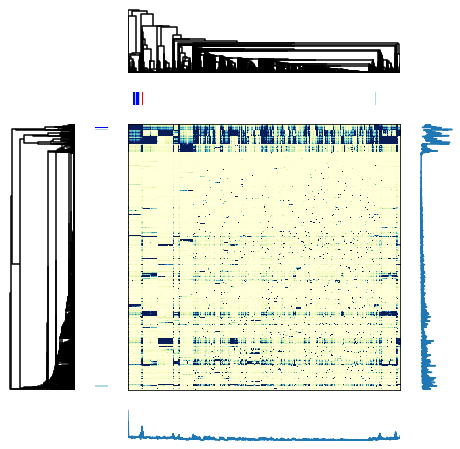

In [950]:
#colors = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'none' for i in e_pcc.nodes]
fig = plt.figure(figsize=(8, 8))
from matplotlib import gridspec
gs = gridspec.GridSpec(4,4, width_ratios=[1,.2,4,.5], height_ratios=[1,.2,4,.5])
ax_row_dend = fig.add_subplot(gs[2,0])
ax_col_dend = fig.add_subplot(gs[0,2])
ax_row_dend.set_axis_off()
ax_col_dend.set_axis_off()

ax_row_colors = fig.add_subplot(gs[2,1])
ax_col_colors = fig.add_subplot(gs[1,2])

ax_heatmap = fig.add_subplot(gs[2,2])

ax_row_data = fig.add_subplot(gs[2,3])
ax_row_data.set_axis_off()

ax_col_data = fig.add_subplot(gs[3,2])
ax_col_data.set_axis_off()
# Y = sch.linkage(D, method='centroid')
# orientation='left' is reponsible for making the
# dendrogram appear to the left
Z1 = sch.dendrogram(row_linkage, orientation='left',
        link_color_func=lambda k: 'black', ax = ax_row_dend)
# top side dendogram
#Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(col_linkage, color_threshold=0, 
                    link_color_func=lambda k: 'black',
                   ax = ax_col_dend)


#axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx1,axis=0)
heatmap(np.flip(matrix), cmap=cmap, cbar=False, ax = ax_row_colors, xticklabels=False, yticklabels=False)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx2,axis=1)
heatmap(matrix, cmap=cmap, cbar=False, ax = ax_col_colors, xticklabels=False, yticklabels=False)

#prs_mat = e_pcc.prs_mat
#prs_mat = prs_mat[idx1, :]
#prs_mat = prs_mat[:, idx2]
prs_mat_cl = prs_mat_cl[idx1, :]
prs_mat_cl = prs_mat_cl[:, idx2]
# the actual heat-map
im = ax_heatmap.matshow(prs_mat_cl, aspect='auto',
                      origin='lower', cmap="YlGnBu")
ax_heatmap.set_xticks([])
ax_heatmap.set_yticks([])

# xticks to the right (x-axis)
#ax_heatmap.set_xticks(range(40))
ax_heatmap.set_xticklabels(idx1, minor=False)
ax_heatmap.xaxis.set_label_position('bottom')
ax_heatmap.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=8)  # ,colors='black')

# xticks to the right (y-axis)
#ax_heatmap.set_yticks(range(40))
ax_heatmap.set_yticklabels(idx2, minor=False)
ax_heatmap.yaxis.set_label_position('right')
ax_heatmap.yaxis.tick_right()
#ax_heatmap.set_axis_off()
# to add the color bar
# axcolor = fig.add_axes([0.94, 0.1, 0.02, 0.6])
ax_colorbar = fig.add_subplot(gs[0, 0])
ax_colorbar.set_axis_off()
#ax_colorbar = fig.add_axes([0.0, 0.71, 0.1, .2])
row_data = np.mean(prs_mat[idx1, :], axis=1)
    # ,orientation=u'vertical')
ax_row_data.plot((row_data), range(len(row_data)), '-')
ax_row_data.set_ylim(0,len(row_data))

col_data = np.mean(prs_mat[:, idx2], axis=0)
    # ,orientation=u'vertical')
ax_col_data.plot(range(len(col_data)), col_data, '-')
ax_col_data.set_xlim(0,len(col_data))
#plt.axis('off')

#plt.colorbar(im, ax=ax_colorbar)
plt.show()


# Normalized TCA

In [953]:
prs_mat = e_pcc.prs_mat
quantile_threshold =  0.95
method = 'ward'
q99 = np.quantile(prs_mat, quantile_threshold)
prs_mat_cl = copy.deepcopy(prs_mat)
prs_mat_cl[prs_mat_cl > q99] = q99
# , optimal_ordering=True)
row_linkage_cl = sch.linkage(sch.distance.pdist(prs_mat_cl), method=method)
# ,optimal_ordering=True)
col_linkage_cl = sch.linkage(sch.distance.pdist(prs_mat_cl.T), method=method)



In [954]:
sensor_tca = ['mdh1', 'fum1', 'fbp1', 'sdh5']
middle_resp = ['sdh2', 'sdh4','sdh1','atp14','hap2']
effectors_mito = np.setdiff1d(high_eff_low_deg.orf_name.tolist() , ['ctf4','rfc5-1'])
colors = ['red' if i in sensor_tca else 'blue' if i in effectors_mito else 'lightblue' if i in middle_resp else 'none' for i in e_pcc.nodes]


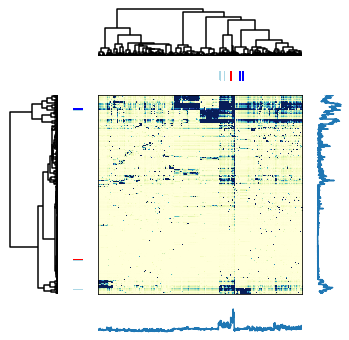

In [955]:

fig = plt.figure(figsize=(6, 6))
from matplotlib import gridspec
gs = gridspec.GridSpec(4,4, width_ratios=[1,.2,4,.5], height_ratios=[1,.2,4,.5])
ax_row_dend = fig.add_subplot(gs[2,0])
ax_col_dend = fig.add_subplot(gs[0,2])
ax_row_dend.set_axis_off()
ax_col_dend.set_axis_off()

ax_row_colors = fig.add_subplot(gs[2,1])
ax_col_colors = fig.add_subplot(gs[1,2])

ax_heatmap = fig.add_subplot(gs[2,2])

ax_row_data = fig.add_subplot(gs[2,3])
ax_row_data.set_axis_off()

ax_col_data = fig.add_subplot(gs[3,2])
ax_col_data.set_axis_off()
# Y = sch.linkage(D, method='centroid')
# orientation='left' is reponsible for making the
# dendrogram appear to the left
Z1_cl = sch.dendrogram(row_linkage_cl, orientation='left',
        link_color_func=lambda k: 'black', ax = ax_row_dend)
# top side dendogram
#Y = sch.linkage(D, method='single')
Z2_cl = sch.dendrogram(col_linkage_cl, color_threshold=0, 
                    link_color_func=lambda k: 'black',
                   ax = ax_col_dend)


#axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1_cl = Z1_cl['leaves']
idx2_cl = Z2_cl['leaves']

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx1_cl,axis=0)
heatmap(np.flip(matrix), cmap=cmap, cbar=False, ax = ax_row_colors, xticklabels=False, yticklabels=False)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx2_cl,axis=1)
heatmap(matrix, cmap=cmap, cbar=False, ax = ax_col_colors, xticklabels=False, yticklabels=False)

#prs_mat = e_pcc.prs_mat
#prs_mat = prs_mat[idx1, :]
#prs_mat = prs_mat[:, idx2]
prs_mat_cl = prs_mat_cl[idx1_cl, :]
prs_mat_cl = prs_mat_cl[:, idx2_cl]
# the actual heat-map
im = ax_heatmap.matshow(prs_mat_cl, aspect='auto', #norm=mpl.colors.PowerNorm(gamma=2), 
                      origin='lower', cmap="YlGnBu")
ax_heatmap.set_xticks([])
ax_heatmap.set_yticks([])

# xticks to the right (x-axis)
#ax_heatmap.set_xticks(range(40))
ax_heatmap.set_xticklabels(idx1_cl, minor=False)
ax_heatmap.xaxis.set_label_position('bottom')
ax_heatmap.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=8)  # ,colors='black')

# xticks to the right (y-axis)
#ax_heatmap.set_yticks(range(40))
ax_heatmap.set_yticklabels(idx2_cl, minor=False)
ax_heatmap.yaxis.set_label_position('right')
ax_heatmap.yaxis.tick_right()
#ax_heatmap.set_axis_off()
# to add the color bar
# axcolor = fig.add_axes([0.94, 0.1, 0.02, 0.6])
ax_colorbar = fig.add_subplot(gs[0, 0])
ax_colorbar.set_axis_off()
#ax_colorbar = fig.add_axes([0.0, 0.71, 0.1, .2])
row_data = np.mean(prs_mat_cl, axis=1)
    # ,orientation=u'vertical')
ax_row_data.plot((row_data), range(len(row_data)), '-')
ax_row_data.set_ylim(0,len(row_data))

col_data = np.mean(prs_mat_cl, axis=0)
    # ,orientation=u'vertical')
ax_col_data.plot(range(len(col_data)), col_data, '-')
ax_col_data.set_xlim(0,len(col_data))
#plt.axis('off')

#plt.colorbar(im, ax=ax_colorbar)
plt.show()


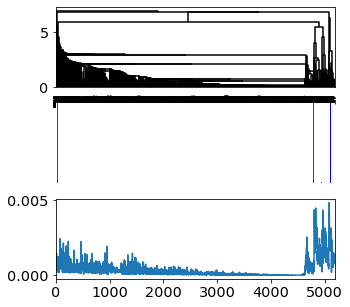

In [842]:
fig , (ax1,ax2,ax3) = plt.subplots(3,1)

sch.dendrogram(row_linkage, orientation='top',
        link_color_func=lambda k: 'black', ax = ax1)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx1,axis=1)
heatmap((matrix), cmap=cmap, cbar=False, ax = ax2, xticklabels=False, yticklabels=False)

ax3.plot(range(len(row_data)), (row_data) , '-')
ax3.set_xlim(0,len(row_data))
plt.show()

In [843]:
len([i for i in colors if i =='blue'])

12

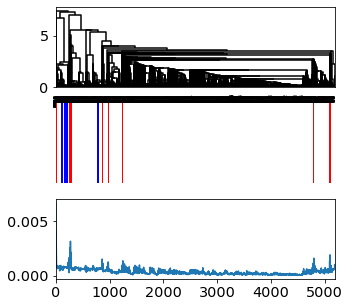

In [825]:
fig , (ax1,ax2,ax3) = plt.subplots(3,1)

sch.dendrogram(col_linkage, orientation='top',
        link_color_func=lambda k: 'black', ax = ax1)

matrix, cmap = ClusterGrid.color_list_to_matrix_and_cmap(colors, idx2,axis=1)
heatmap(matrix, cmap=cmap, cbar=False, ax = ax2, xticklabels=False, yticklabels=False)

ax3.plot(range(len(row_data)), (col_data) , '-')
ax3.set_xlim(0,len(row_data))
plt.show()

In [597]:
row_colors = [colors[i] for i in idx1]
col_colors = [colors[i] for i in idx2]

In [546]:
row_dist = sch.distance.squareform(sch.distance.pdist(prs_mat_cl))
col_dist = sch.distance.squareform(sch.distance.pdist(prs_mat_cl.T))

In [556]:
row_dist_square = sch.distance.squareform(row_dist)
col_dist_square = sch.distance.squareform(col_dist)

In [558]:
%%R -i row_dist_square
row_clust = hclust(as.dist(row_dist_square), 'ward.D2')

In [559]:
%%R -i col_dist_square
col_clust = hclust(as.dist(col_dist_square), 'ward.D2')

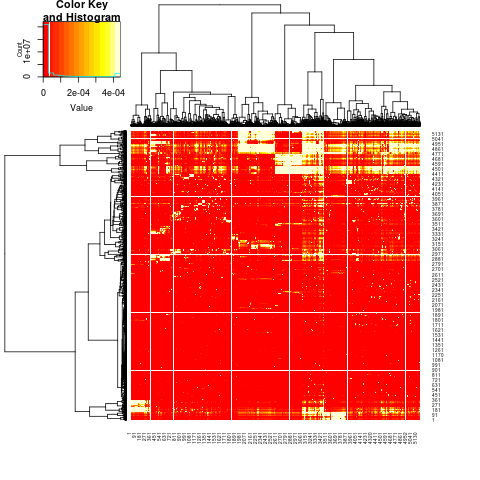

In [567]:
%%R -i prs_mat_cl

library(gplots)
heatmap.2(prs_mat_cl,trace='none', Rowv = as.dendrogram(row_clust), Colv = as.dendrogram(col_clust))



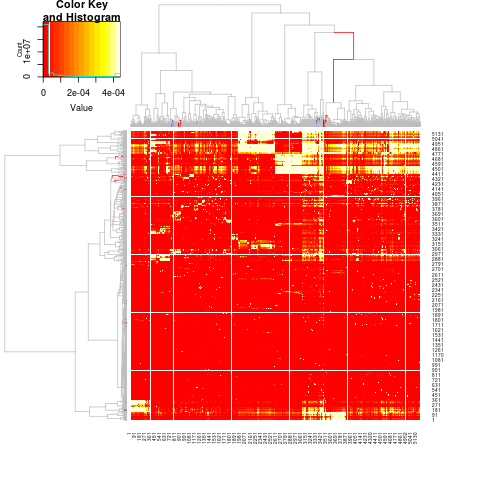

In [602]:
%%R -i prs_mat_cl -i row_colors -i col_colors
row_dend = as.dendrogram(row_clust)
col_dend = as.dendrogram(col_clust)

row_dend = dendextend::set(row_dend, 'branches_col', rev(unlist(row_colors)))
col_dend = dendextend::set(col_dend, 'branches_col', rev(unlist(col_colors)))

heatmap.2(prs_mat_cl,trace='none', Rowv = row_dend, Colv = col_dend)


# Randomized network eff values

In [412]:
rand_dfs = [pd.read_csv(f'data/interim/pcc_1020/random_dfs/rand_{i}.csv') for i in range(100)]

In [486]:
rand_effs = [rand_dfs[i].eff.tolist() for i in range(100)]
rand_sens = [rand_dfs[i].sens.tolist() for i in range(100)]

In [490]:
ids_sig_eff = []
ids_sig_sens = []
for i in range(e_pcc.df.shape[0]):
    #i=0
    rand_eff =[rand_effs[j][i] for j in range(100)] 
    real_eff = e_pcc.df.eff[i]
    if sum(rand_eff>real_eff)<1:
        ids_sig_eff.append(i)
    rand_sen =[rand_sens[j][i] for j in range(100)] 
    real_sen = e_pcc.df.sens[i]
    if sum(rand_sen>real_sen)<1:
        ids_sig_sens.append(i)



In [510]:
len(ids_sig_sens)

4371

In [511]:
len(ids_sig_eff)

1338

In [491]:
effector_pcc.shape

(52, 26)

In [492]:
effector_pcc.loc[effector_pcc.orf_name.isin(e_pcc.df.iloc[ids_sig_eff,:].orf_name)].shape

(52, 26)

In [493]:
sensors.shape

(52, 17)

In [494]:
sensors.loc[sensors.orf_name.isin(e_pcc.df.iloc[ids_sig_sens,:].orf_name)].shape

(28, 17)

In [496]:
goea, geneid2name = create_goea(gaf = 'data/raw/ontology/sgd.gaf', obo_fname='data/raw/ontology/go-basic.obo', background='data/interim/costanzo_gc_bg.tsv', sgd_info_tab = 'data/raw/ontology/SGD_features.tab')


data/raw/ontology/go-basic.obo: fmt(1.2) rel(2019-06-01) 47,444 GO Terms
HMS:0:00:01.418147 119,640 annotations READ: data/raw/ontology/sgd.gaf 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 84%  3,934 of  4,660 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 89%  4,168 of  4,660 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 73%  3,399 of  4,660 population items found in association


In [507]:
goea_res_all = goea.run_study(sgd_tab_comb.loc[sgd_tab_comb.orf_name.isin(sensors.loc[sensors.orf_name.isin(e_pcc.df.iloc[ids_sig_sens,:].orf_name)].orf_name)][0].tolist())
goea_res_sig = [r for r in goea_res_all if r.p_fdr_bh <0.05]
go_df_sensor = goea_to_pandas(goea_res_sig, geneid2name)


Run BP Gene Ontology Analysis: current study set of 28 IDs ... 90%     18 of     20 study items found in association
 71%     20 of     28 study items found in population(4660)
Calculating 2,792 uncorrected p-values using fisher_scipy_stats
   2,792 GO terms are associated with  3,934 of  4,660 population items
      67 GO terms are associated with     18 of     20 study items
  METHOD fdr_bh:
       4 GO terms found significant (< 0.05=alpha) (  4 enriched +   0 purified): statsmodels fdr_bh
       8 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Run CC Gene Ontology Analysis: current study set of 28 IDs ... 95%     19 of     20 study items found in association
 71%     20 of     28 study items found in population(4660)
Calculating 795 uncorrected p-values using fisher_scipy_stats
     795 GO terms are associated with  4,168 of  4,660 population items
      25 GO terms are associated with     19 of     20 

In [508]:
go_df_sensor

GO  NS enrichment  \
0  GO:0031930  BP          e   
1  GO:0071400  BP          e   
2  GO:0045944  BP          e   
3  GO:0015823  BP          e   

                                                name ratio_in_study  \
0             mitochondria-nucleus signaling pathway        (3, 20)   
1                    cellular response to oleic acid        (2, 20)   
2  positive regulation of transcription by RNA po...        (6, 20)   
3                            phenylalanine transport        (2, 20)   

  ratio_in_pop  p_uncorrected  depth  study_count  p_fdr_bh  \
0    (6, 4660)       0.000001      5            3  0.003746   
1    (2, 4660)       0.000018      7            2  0.024434   
2  (168, 4660)       0.000051     11            6  0.036556   
3    (3, 4660)       0.000052     10            2  0.036556   

                                         study_items  
0                        [YGL252C, YOL067C, YBL103C]  
1                                 [YOL067C, YBL103C]  
2  [YHR006W, YBL103C, YDR463W, YJR094C, YGL252C, ...  
3                                 [YCL025C, YBR068C]

# Covariance comparison


In [181]:
cov = e_pcc.gnm.getCovariance()

In [182]:
cov

array([[ 1.00441086e-01,  5.93659706e-02,  1.84837936e-02, ...,
        -4.91212284e-04, -8.61422913e-04,  8.84005292e-04],
       [ 5.93659706e-02,  5.65749293e-01,  7.23255533e-02, ...,
        -5.92925737e-04, -9.44836545e-04,  1.92641050e-04],
       [ 1.84837936e-02,  7.23255533e-02,  1.26360251e-01, ...,
        -5.01700738e-04, -8.35311724e-04, -3.05784739e-04],
       ...,
       [-4.91212284e-04, -5.92925737e-04, -5.01700738e-04, ...,
         1.70927316e+00, -1.43308008e-03, -1.49059192e-03],
       [-8.61422913e-04, -9.44836545e-04, -8.35311724e-04, ...,
        -1.43308008e-03,  1.26145825e+00, -1.47213690e-03],
       [ 8.84005292e-04,  1.92641050e-04, -3.05784739e-04, ...,
        -1.49059192e-03, -1.47213690e-03,  2.24497132e+00]])

(<matplotlib.image.AxesImage at 0x7f15ef09f510>,
 [],
 <matplotlib.colorbar.Colorbar at 0x7f15ef0baed0>)

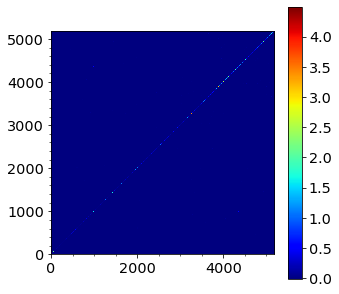

In [184]:
from prody import showMatrix
showMatrix(cov)

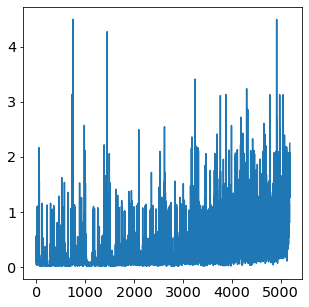

In [186]:
plt.plot(np.diag(cov))

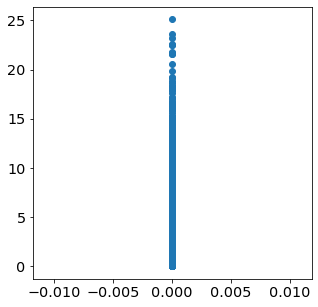

In [191]:
plt.scatter(np.average(cov,axis=0), e_pcc.df.eff)

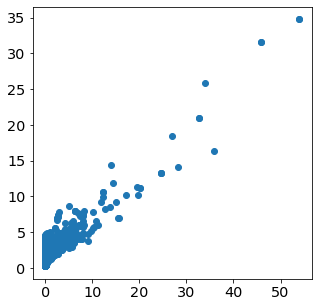

In [194]:
plt.scatter(np.sum(cov**2,axis=0), e_pcc.df.sens)

In [206]:
cor = np.corrcoef(e_pcc.L)

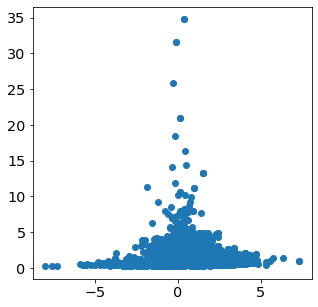

In [212]:
plt.scatter(np.sum(cor,axis=0), e_pcc.df.sens)

(<matplotlib.image.AxesImage at 0x7f15e1710210>,
 [],
 <matplotlib.colorbar.Colorbar at 0x7f15e13a6f90>)

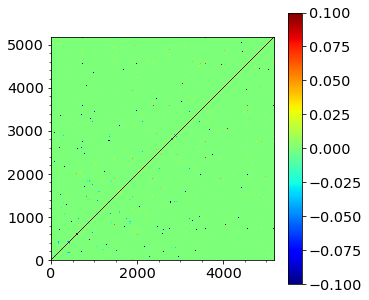

In [207]:
showMatrix(cor,percentile=5)

(<matplotlib.image.AxesImage at 0x7f15e184ead0>,
 [],
 <matplotlib.colorbar.Colorbar at 0x7f15e1883c50>)

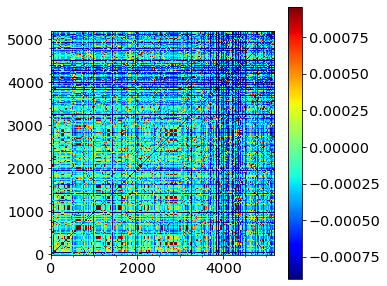

In [200]:
showMatrix(cov,percentile=5)

(<matplotlib.image.AxesImage at 0x7f15e1b4ba10>,
 [],
 <matplotlib.colorbar.Colorbar at 0x7f15e1b7db90>)

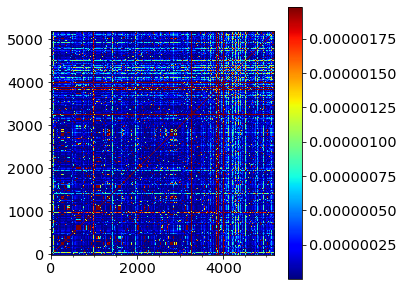

In [197]:
showMatrix(cov**2,percentile=5)

(<matplotlib.image.AxesImage at 0x7f15e194cf50>,
 [],
 <matplotlib.colorbar.Colorbar at 0x7f15e197ff50>)

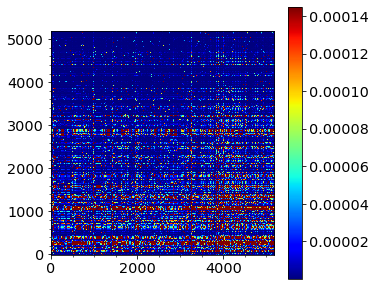

In [199]:
showMatrix(e_pcc.prs_mat,percentile=10)

In [952]:
sga_exe = pd.read_csv('~/pgsNetwork/analysis/data/raw_data/SGA_ExE.txt','\t')
sga_exe.head()

Query Strain ID Query allele name  Array Strain ID Array allele name  \
0  YAL001C_tsq508        tfc3-g349e   YBL023C_tsa111            mcm2-1   
1  YAL001C_tsq508        tfc3-g349e  YBL026W_tsa1065         lsm2-5001   
2  YAL001C_tsq508        tfc3-g349e   YBL034C_tsa274            stu1-5   
3  YAL001C_tsq508        tfc3-g349e   YBL034C_tsa454            stu1-8   
4  YAL001C_tsq508        tfc3-g349e   YBL034C_tsa643            stu1-6   

  Arraytype/Temp  Genetic interaction score (ε)   P-value  \
0          TSA30                        -0.0348  0.005042   
1          TSA30                        -0.3529  0.000004   
2          TSA30                         0.0126  0.462500   
3          TSA30                         0.0043  0.499800   
4          TSA30                        -0.1601  0.051400   

   Query single mutant fitness (SMF)  Array SMF  Double mutant fitness  \
0                             0.8285     0.9254                 0.7319   
1                             0.8285     0.9408                 0.4266   
2                             0.8285     0.8925                 0.7520   
3                             0.8285     0.7988                 0.6661   
4                             0.8285     0.7683                 0.4764   

   Double mutant fitness standard deviation  
0                                    0.0102  
1                                    0.0790  
2                                    0.1338  
3                                    0.0831  
4                                    0.1395